# Deep ViT Features - Point Correspondences
Given a pair of images, find $k$ semantic correspondences between them.

In [ ]:
#@title Installations and mounting
!pip install tqdm
!pip install faiss-cpu
!pip install timm
!pip install opencv-python
!pip install git+https://github.com/lucasb-eyer/pydensecrf.git
!git clone https://github.com/ShirAmir/dino-vit-features.git
import sys
sys.path.append('dino-vit-features')
%load_ext autoreload
%autoreload 2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.1 MB/s eta 0:00:00
  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-g_ecdqkt
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-g_ecdqkt
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit 2723c7fa4f2ead16ae1ce3d8afe977724bb8f87f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pydensecrf: filename=pydensecrf-1.0-cp310-cp310-linux_x86_64.whl size=3405187 sha256=810985c1cf88e62303a3b10bedd58ea78bf7fcf1b69925d349a0e0dcd2af911f
  Stored in directory: /tmp/pip-ephem-wheel-cache-29l0s3gp/wheels/01/5b/61/87443ed3bf03dd2940375cf2f8b6fba88efece935465e490b0
Successfully built pydensecrf
Cloning into 'dino-vit-features'...
remote: Enumerating

## Change Runtime Type
To get a GPU in Google Colab, go to the top menu: Runtime ➔ Change runtime type and select GPU as Hardware accelerator.

In [ ]:
#@title Configuration:
#@markdown Choose image paths:

image_path1 = 'dino-vit-features/images/cat.jpg' #@param
image_path2 = 'dino-vit-features/images/ibex.jpg' #@param

#@markdown Choose number of points to output:
num_pairs = 10 #@param
#@markdown Choose loading size:
load_size = 224 #@param
#@markdown Choose layer of descriptor:
layer = 9 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=True #@param
#@markdown Choose fg / bg threshold:
thresh=0.05 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall8_pretrain/dino_deitsmall8_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall8_pretrain.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 189MB/s]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


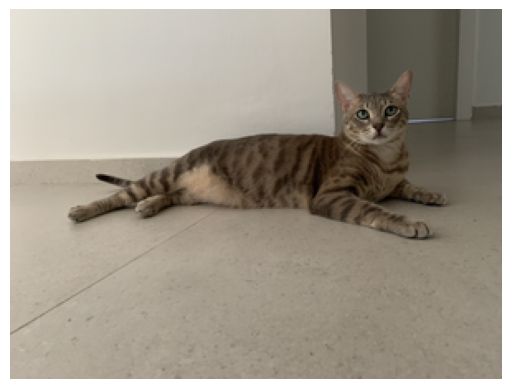

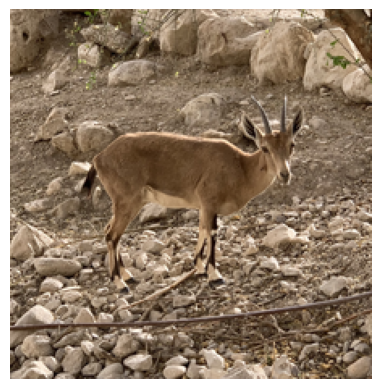

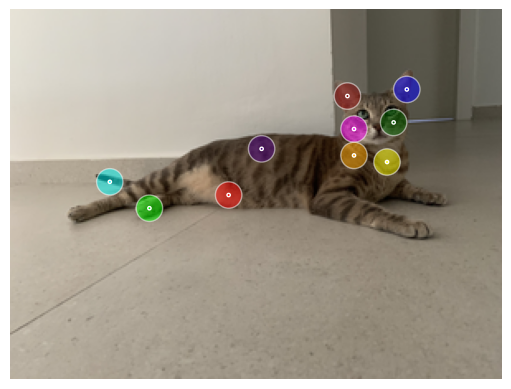

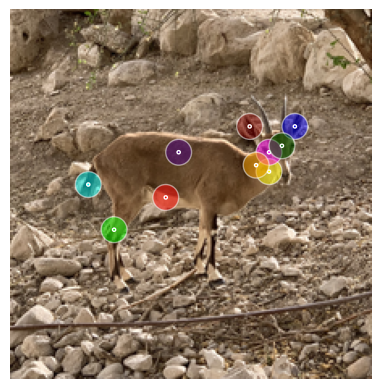

In [ ]:
import matplotlib.pyplot as plt
import torch
from correspondences import find_correspondences, draw_correspondences

with torch.no_grad():
    points1, points2, image1_pil, image2_pil = find_correspondences(image_path1, image_path2, num_pairs, load_size, layer,
                                                                   facet, bin, thresh, model_type, stride)
fig_1, ax1 = plt.subplots()
ax1.axis('off')
ax1.imshow(image1_pil)
fig_2, ax2 = plt.subplots()
ax2.axis('off')
ax2.imshow(image2_pil)


fig1, fig2 = draw_correspondences(points1, points2, image1_pil, image2_pil)
plt.show()